In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# 1. Load the breast cancer dataset
data = load_breast_cancer()

In [6]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [7]:
data.filename

'breast_cancer.csv'

In [8]:
# 2. Convert to Pandas DataFrame
breast_cancer_data = pd.DataFrame(data.data, columns=data.feature_names)

## Exploratory Data Analysis

In [9]:
# Display 3 rows from the data
breast_cancer_data.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

In [10]:
# Add the target variable (0 = Malignant, 1 = Benign)
breast_cancer_data['target'] = data.target

In [11]:
# Display 3 rows from the data
breast_cancer_data.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [13]:
# Get basic info about the dataset
print("\nDataset Info:")
breast_cancer_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [15]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(breast_cancer_data.describe())


Summary Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [16]:
# Check for missing values
print("\nMissing Values:")
print(breast_cancer_data.isnull().sum())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


As there were no missing values, there is no need for imputation of missing values 

In [17]:
# Check distribution of the target variable
print("\nTarget Distribution (0 = Malignant, 1 = Benign):")
print(breast_cancer_data['target'].value_counts())


Target Distribution (0 = Malignant, 1 = Benign):
1    357
0    212
Name: target, dtype: int64


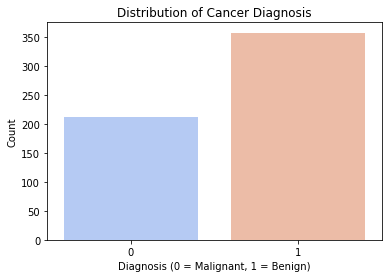

In [21]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=breast_cancer_data, palette='coolwarm',hue='target',legend=False)
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()

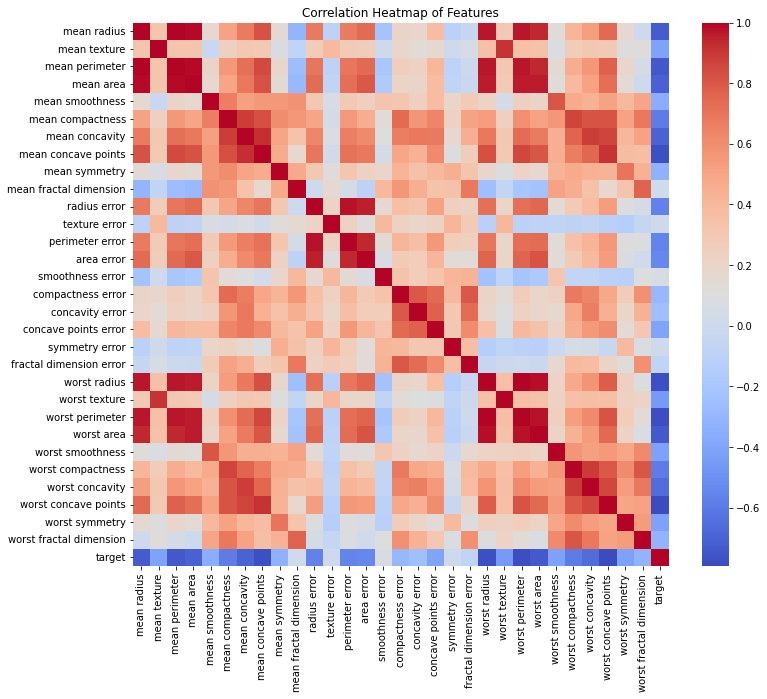

In [22]:
#  Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(breast_cancer_data.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

**Correlation Overview:** The heatmap shows both positive (red) and negative (blue) correlations between the features. Darker red indicates a strong positive correlation (close to 1), while darker blue shows a strong negative correlation (close to -1).

**Highly Correlated Features:**

- Some groups of features are highly positively correlated with each other. For example:
    `mean radius`, `mean perimeter`, `mean area`, and `mean concave points` show strong positive correlations with each other.
    - Similarly, `worst radius`, `worst perimeter`, `worst area`, and` worst concave points` are also highly correlated.
- This suggests that some of these features might carry redundant information and could be candidates for dimensionality reduction techniques like PCA to avoid multicollinearity.

**Low or Negative Correlation:**

- Features such as `mean smoothness`, `mean symmetry`, and `mean fractal dimension` appear to have relatively low correlations       with other features.
- There are also some instances of negative correlations (blue areas), though they are relatively weaker than the positive ones.

**Finally Target Variable Correlation:**

- The target variable (which distinguishes between malignant and benign tumors) shows a relatively strong correlation with some features like `mean radius`, `mean perimeter`, and `worst concave points`, indicating these features are important in predicting the target.
- Other features, such as mean fractal dimension, show much weaker correlations with the target.


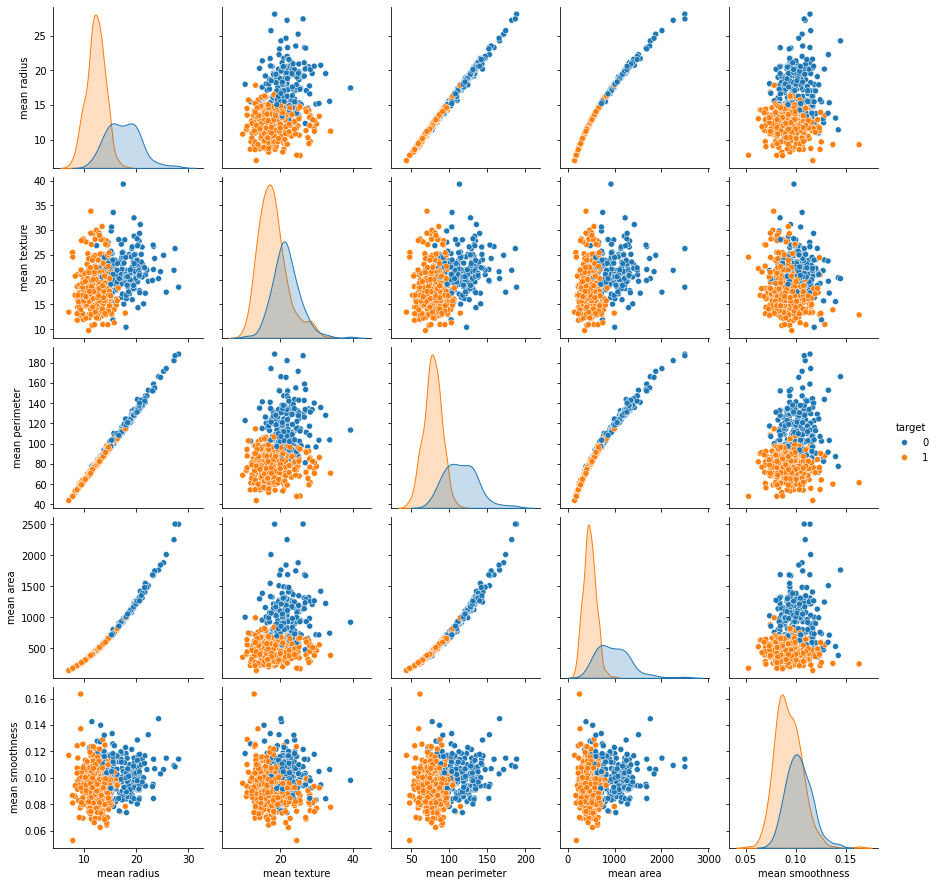

In [24]:
# Pairplot of the dataset with the target variable
sns.pairplot(breast_cancer_data, hue='target', vars=data.feature_names[:5])
plt.show()

- Strong positive correlations are evident between `mean radius`, `mean perimeter`, `mean area`, and `mean smoothness`. This suggests that these features are highly correlated with each other, which might be expected given the nature of breast cancer tumors.

- `mean texture` seems to have a weaker correlation with the other features, indicating a less direct relationship.

- The scatter plots off the diagonal reveal how the features vary across the two classes. For instance, the scatter plot between `mean radius` and `target` shows a trend where larger mean radius values are more likely to belong to class 1 (potentially benign tumors).

### Final thought on EDA...

This correlation heatmap indicates that some features are highly correlated with each other, which could introduce redundancy in the dataset. Applying PCA or other feature selection methods would help reduce this redundancy and improve model performance. The features highly correlated with the target variable could be especially useful in the prediction of cancer malignancy or benignity.

## PCA Implementation without Feature Engineering

In [45]:
data = load_breast_cancer()
X = data.data
y = data.target

In [46]:
#Standardize the dataset (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

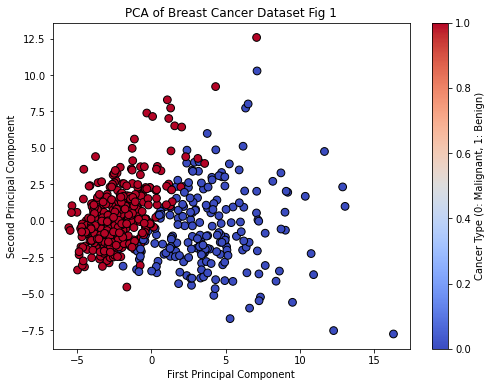

In [49]:
#Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=60)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset Fig 1')
plt.colorbar(label='Cancer Type (0: Malignant, 1: Benign)')
plt.show()

#### Fig 1.

In [50]:
#Logistic Regression using the PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.97
Confusion Matrix:
[[ 60   3]
 [  2 106]]


## Feature Engineering, Feature Selection and PCA Implementation

I'll be leveraging on the lesson learnt from Module 1 to 5 here, so we'll be building our class on top known ML models, data scaling and nomalization to structure our feature engineering, selection and prediction, more like inheriting from TransformerMixin and BaseEstimator but I'll build this different.

**The Approach:**
- **Base Class:** This will contain the common methods for normalization, feature engineering, feature selection, and PCA.
- **Child Class:** This will inherit from the base class and handle the specific application of these methods for the breast         cancer dataset.
- **Scikit-learn Pipeline:** A combination of normalization, feature engineering, selection, and PCA can be implemented in a methodical way, which can be easily extended or modified.

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Base Class for ML pipeline components
class BaseMLPipeline:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.scaler = StandardScaler()
        self.pca = None
        self.model = None
        self.feature_selector = None
        self.processed_data = None

    def normalize(self):
        """Standardize the features by removing the mean and scaling to unit variance."""
        features = self.data.drop(columns=[self.target_column])
        self.processed_data = pd.DataFrame(self.scaler.fit_transform(features), columns=features.columns)
        print("Data has been normalized.")
    
    def feature_engineering(self):
        """Add polynomial features (degree 2) for feature engineering."""
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        self.processed_data = pd.DataFrame(poly.fit_transform(self.processed_data), 
                                           columns=poly.get_feature_names_out(self.processed_data.columns))
        print("Polynomial feature engineering completed.")

    def feature_selection(self):
        """Select features using RandomForest for feature importance."""
        X = self.processed_data  # Assuming processed_data is a DataFrame with feature names
        y = self.data[self.target_column]  # Target column for classification

        # Fit the RandomForest classifier
        forest = RandomForestClassifier(random_state=42)
        forest.fit(X, y)

        # Use SelectFromModel to select features based on importance
        sel = SelectFromModel(forest, threshold='mean', prefit=True)

        # Apply the selection and retain feature names
        selected_features = X.columns[sel.get_support()]  # Retain only selected features
        self.processed_data = pd.DataFrame(sel.transform(X), columns=selected_features)

        print(f"Selected {self.processed_data.shape[1]} important features: {list(selected_features)}\n")

    
    def apply_pca(self, n_components=2):
        """Apply PCA to reduce dimensionality."""
        self.pca = PCA(n_components=n_components)
        self.processed_data = self.pca.fit_transform(self.processed_data)
        print(f"\nPCA applied. Reduced to {n_components} components.")

    def plot_pca(self):
        """Plot PCA result in a scatter plot."""
        plt.figure(figsize=(12, 8))
        plt.scatter(self.processed_data[:, 0], self.processed_data[:, 1], 
                    c=self.data[self.target_column], cmap='coolwarm', edgecolor='k', s=60)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('PCA of Dataset')
        plt.colorbar(label='Cancer Type (0 = Malignant, 1 = Benign)')
        plt.show()

# Inherit from BaseMLPipeline to customize for the breast cancer dataset
class CancerDataPipeline(BaseMLPipeline):
    def __init__(self, data, target_column='target'):
        super().__init__(data, target_column)

    # Add any cancer-specific methods or adjustments here if needed
    def feature_engineering(self):
        """Override to include different feature engineering for cancer data, if needed."""
        super().feature_engineering()  # Call the parent method

    def plot_heatmap(self):
        """Plot the correlation heatmap of the dataset."""
        corr_matrix = self.data.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
        plt.title('Correlation Heatmap of Features')
        plt.show()
        
    def logistic_regression_with_pca(self):
        """Fit logistic regression using the PCA components."""
        
        # Check if PCA was already applied
        if self.processed_data.shape[1] != 2:
            print("Ensure PCA is applied before logistic regression.")
            return

        # Split data into training and test sets (70% train, 30% test)
        X_train, X_test, y_train, y_test = train_test_split(self.processed_data, 
                                                            self.data[self.target_column], 
                                                            test_size=0.3, 
                                                            random_state=42)

        # Initialize logistic regression model
        logreg = LogisticRegression(random_state=42)

        # Fit the model on the training set
        logreg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = logreg.predict(X_test)

        # Output accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Logistic Regression Accuracy with PCA: {accuracy:.4f}")

        # Optional: Output classification report for detailed metrics
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        

Data has been normalized.


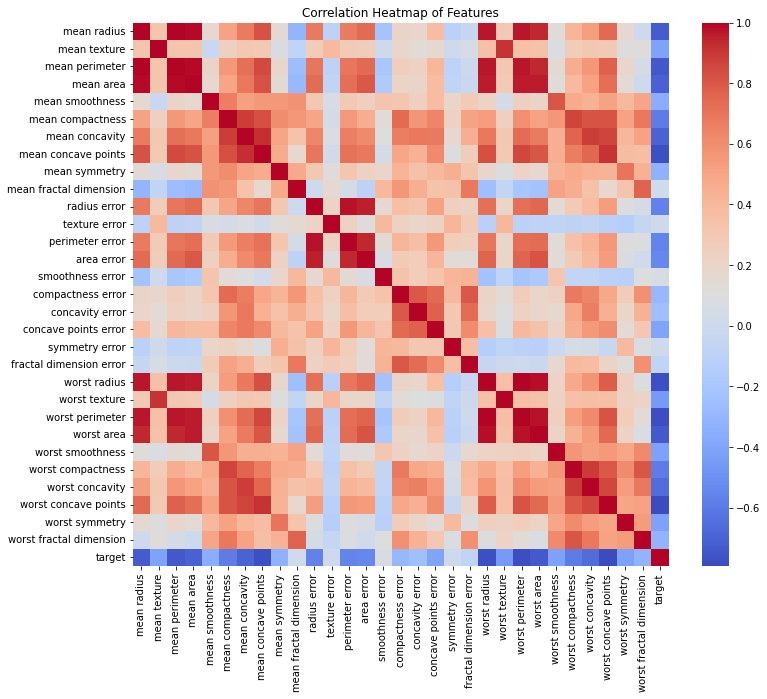

Polynomial feature engineering completed.
Selected 66 important features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'mean radius perimeter error', 'mean radius area error', 'mean texture mean perimeter', 'mean perimeter radius error', 'mean perimeter perimeter error', 'mean perimeter area error', 'mean perimeter worst smoothness', 'mean area mean concavity', 'mean area mean concave points', 'mean area radius error', 'mean area perimeter error', 'mean area area error', 'mean area worst area', 'mean area worst concavity', 'mean compactness perimeter error', 'mean concavity mean concave points', 'mean concavity perimeter error', 'mean concavity area err

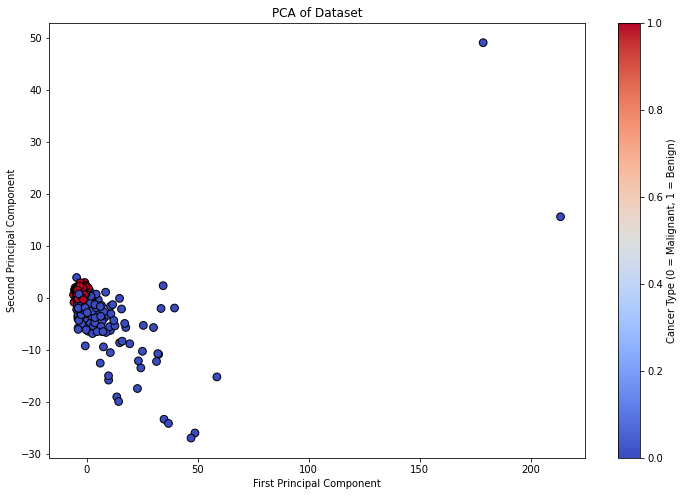

In [41]:
if __name__ == "__main__":
    # Load the breast cancer dataset
    from sklearn.datasets import load_breast_cancer
    cancer_data = load_breast_cancer()

    # Convert to DataFrame
    df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    # Initialize the pipeline
    pipeline = CancerDataPipeline(df, target_column='target')

    # Perform normalization
    pipeline.normalize()

    # Optional: Perform EDA - Correlation Heatmap
    pipeline.plot_heatmap()

    # Perform feature engineering
    pipeline.feature_engineering()

    # Perform feature selection using RandomForest
    pipeline.feature_selection()

    # Apply PCA to reduce dimensionality
    pipeline.apply_pca(n_components=2)

    # Plot PCA results
    pipeline.plot_pca()

### Fig 2.

The first principal component appears to play a more significant role in separating the classes than the second component. This is evident from the elongated shape of the clusters along the first principal component axis.

### Logistic Regreesion from feature engineered PCA

In [43]:
# Train and evaluate logistic regression using PCA components
pipeline.logistic_regression_with_pca()

Logistic Regression Accuracy with PCA: 0.8304

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        63
           1       0.83      0.93      0.87       108

    accuracy                           0.83       171
   macro avg       0.83      0.80      0.81       171
weighted avg       0.83      0.83      0.83       171



## Salient Point

- The PCA plots, one before and one after feature engineering/selection, offer valuable insights into the impact of these preprocessing steps on the data visualization and potential for classification.

- In general, the plot after feature engineering/selection appears to show a more distinct separation between the two classes (malignant and benign). This suggests that the chosen features or transformations have improved the ability to differentiate between these groups.

- However, looking at the accuracy of the logistic regression for both process before and after Feature Engineering and Selection. We had `97%` as accuracy before feature engineering and we had `83%` accuracy after feature engineering


##  What does this mean?
 - We take a look at `Explained Variance Ratio` below; The explained variance ratio values `[0.77618496, 0.07778716]` indicate      that the first principal component `(PC1)` explains about `77.6%` of the variance in the data, while the second principal        component `(PC2)` explains around `7.8%`. This means that `85.4%` of the total variance in the dataset is captured by the        first two PCA components. 
 
  - Since the second component only adds about `7.8%` of the variance, it is likely that the feature engineering and selection       process led to a loss of important variability that PCA is designed to capture. After feature engineering and selection, PCA     might not be able to condense the information in a way that is useful for the logistic regression model.
  
  
## Why the accuracy drops after feature engineering  

**Model Overfitting vs. Generalization:** Before feature engineering, PCA was able to capture enough variance to allow the logistic regression model to perform well. After feature engineering, even though we still capture the main variance, some important features or interactions might have been lost, leading to lower model performance. This suggests that the original features were better aligned with the underlying patterns in the data than the engineered features.

## Suggestions/Recommendation
1. Increasing the Number of PCA Components
2. Remove Feature Engineering
3. Evaluate Feature Selection By Using Different Model e.g recursive feature elimination (RFE) or Lasso regularization

In [51]:
print("Explained variance ratio:", pipeline.pca.explained_variance_ratio_)


Explained variance ratio: [0.77618496 0.07778716]


In [52]:
# Save the results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [53]:
df_pca['Target'] = y


In [57]:
df_pca.to_csv('pca_cancer_results.csv', index=False)